In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/home/hamza/Downloads/DataSets/Mall_Customers.csv')

print(df.info())
print('-------------------------------------------------------------------------------')
print(df.describe())
print('-------------------------------------------------------------------------------')

df.drop(['CustomerID'], axis = 1, inplace = True)

# divided Age column to Groups, so Age column become categorical.
intervals = [15, 20, 30, 40, 50, 60, 70]
df['Age_Groups'] = pd.cut(x = df['Age'], bins = intervals)

# split categorical data to separate columns.
new_df = pd.get_dummies(df)

# since now the Genre_Female and Genre_Male have correlation equal to 1, so drop one of them.
new_df.drop(['Age'], axis = 1, inplace = True)
print(new_df.shape)
print('-------------------------------------------------------------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
-------------------------------------------------------------------------------
       CustomerID         Age  Annual_Income_(k$)  Spending_Score
count  200.000000  200.000000          200.000000      200.000000
mean   100.500000   38.850000           60.560000       50.200000
std     57.879185   13.969007           26.264721       25.823522
min      1.000000   18.000000           15.000000        1.000000
25%     50.750000   28.750000           41.500000       34.750000
50%    100.500000   36.000000

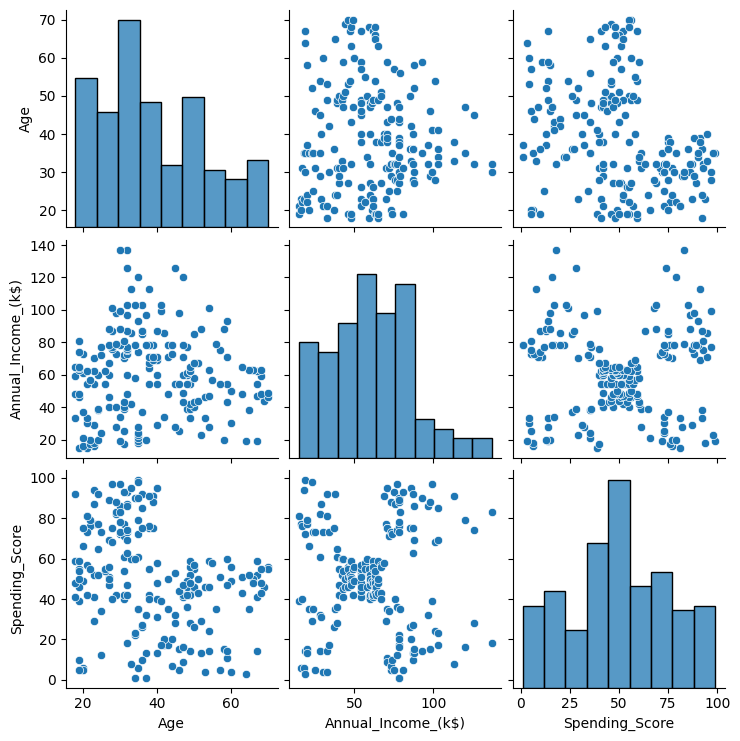

In [9]:
# show pairplot for numeric data.
sns.pairplot(df)
plt.show()

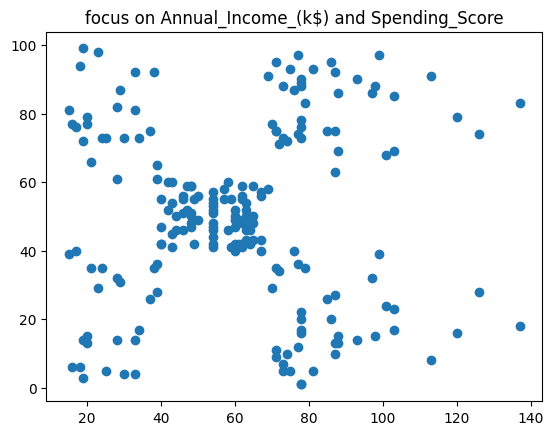

In [3]:
# focuse on correlation between Annual_Income and Spending_Score.
plt.scatter(new_df['Annual_Income_(k$)'], new_df['Spending_Score'])
plt.title('focus on Annual_Income_(k$) and Spending_Score')
plt.show()

[0.509337   0.99909504 0.99946364 0.99965506 0.99977937 0.99986848
 0.99993716 1.         1.         1.        ]
-------------------------------------------------------------------------------


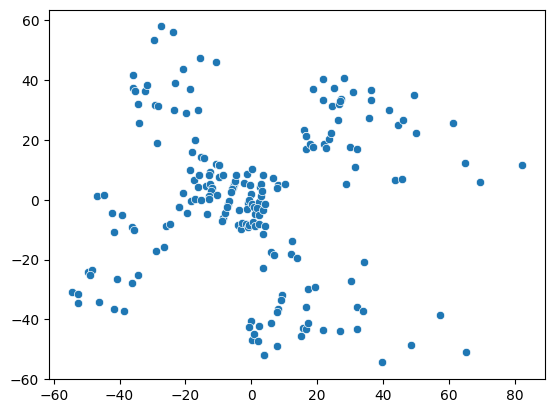

In [57]:
pca = PCA(n_components = 10)
pca.fit_transform(new_df)
print(pca.explained_variance_ratio_.cumsum())
print('-------------------------------------------------------------------------------')

pca = PCA(n_components = 2)
pcs = pca.fit_transform(new_df)
sns.scatterplot(x = pcs[:,0], y = pcs[:,1])
plt.show()

Compare between PCA and (focus on Annual_Income_(k$) with Spending_Score)


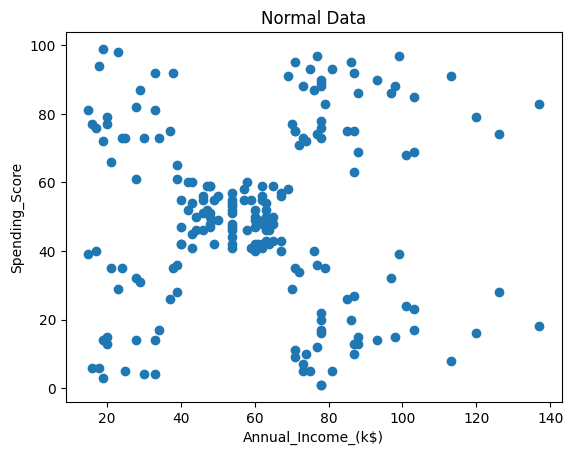

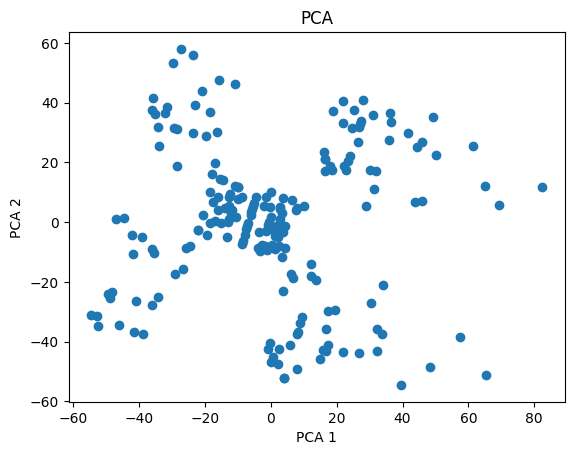

In [39]:
print('Compare between PCA and (focus on Annual_Income_(k$) with Spending_Score)')
('-------------------------------------------------------------------------------')
plt.scatter(df['Annual_Income_(k$)'], df['Spending_Score'])
plt.title('Normal Data')
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()

plt.scatter(pcs[:,0], pcs[:,1])
plt.title('PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


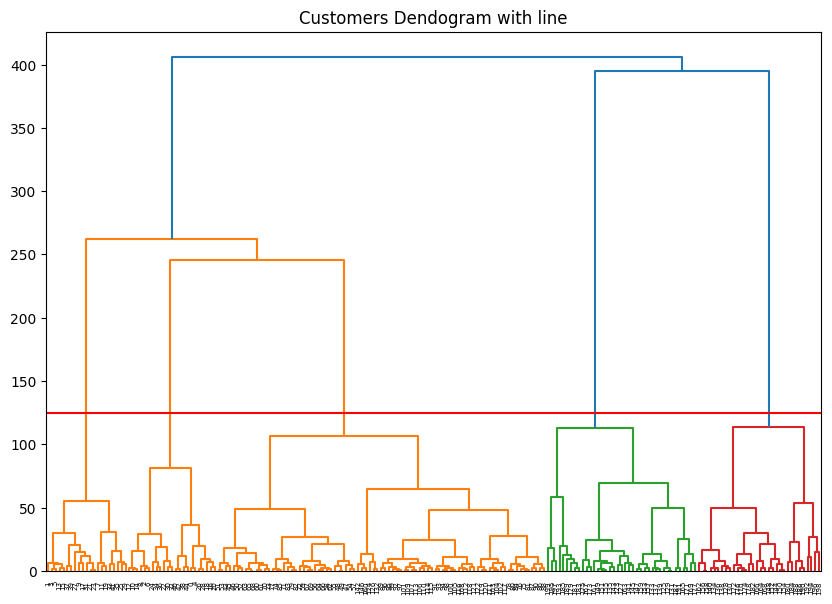

After locating the horizontal line, we count how many times our vertical lines were crossed by it - in this example, 5 times. So 5 seems a good indication of the number of clusters that have the most distance between them.


In [22]:
plt.figure(figsize=(10, 7))
plt.title("Customers Dendogram with line")
# select Annual_Income and Spending_Score by index.
selected_data = new_df.iloc[:,0:2]
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 125, color = 'r', linestyle = '-')
plt.show()
print('After locating the horizontal line, we count how many times our vertical lines were crossed by it - in this example, 5 times. So 5 seems a good indication of the number of clusters that have the most distance between them.')

In [23]:
model = AgglomerativeClustering(n_clusters = 5)
model.fit(selected_data)
model.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

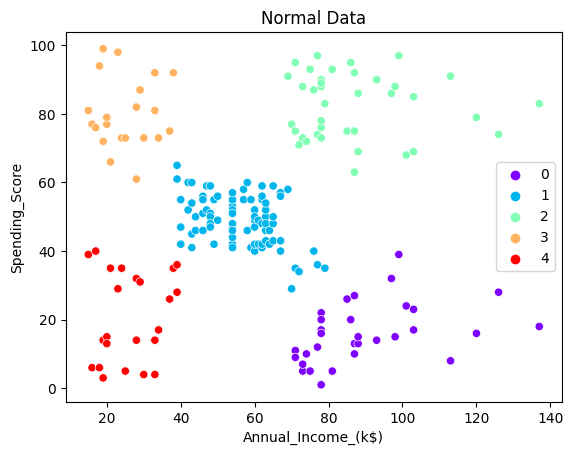

In [34]:
sns.scatterplot(df['Annual_Income_(k$)'], df['Spending_Score'], hue = model.labels_, palette = 'rainbow').set_title('Normal Data')
plt.show()

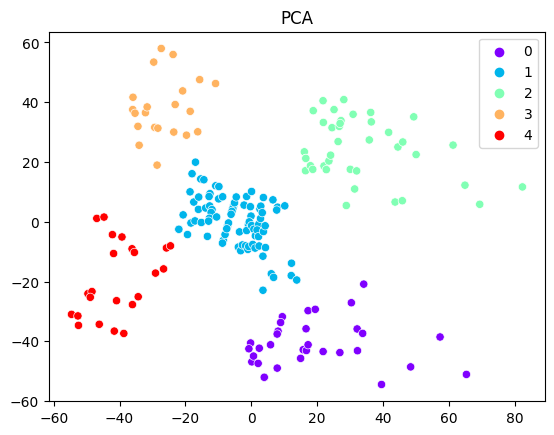

In [58]:
model_pca = AgglomerativeClustering(n_clusters = 5)
model_pca.fit(pcs)

sns.scatterplot(pcs[:,0], pcs[:,1], hue = model_pca.labels_, palette = 'rainbow').set_title('PCA')
plt.show()